# aula_240515_exerc_a3

## Carregar pacotes

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Exercício

1 - Carregar os dados

In [ ]:
dados_paises = pd.read_csv('dados_1997_2011_paises_csv.csv', 
                           sep = ';', 
                           decimal = ',', 
                           encoding = 'latin1')

2 - Criar função

In [ ]:
def znorm(x):

  return (x - min(x)) / (max(x) - min(x))

3 - Criar z_pib e z_pop

In [ ]:
# considerando todos os dados
# dados_paises[['z_pop', 'z_pib']] = dados_paises[['populacao', 'pib']].apply(lambda x: znorm(x))

In [ ]:
# considerando padronizar por ano
dados_paises[['z_pop', 'z_pib']] = dados_paises.groupby('ano')[['populacao', 'pib']].transform(znorm)

4 - Filtrar países

In [ ]:
dados_paises[(dados_paises['ano'] == 2008) & \
             (dados_paises['idh'] > 0.9)]  

,pais,ano,idh,corrupcao_indice,competitividade_indice,globalizacao_indice,pib,populacao,z_pop,z_pib
26,Alemanha,2008,0.902,80,74.74,85.10198,3.623686e+09,82328.58583,0.058641,0.253438
41,Austrália,2008,0.924,87,83.50,81.40752,1.039415e+09,21007.01018,0.012180,0.072675
86,Canadá,2008,0.903,85,82.85,85.80734,1.502678e+09,33212.69600,0.021428,0.105079
161,Estados Unidos,2008,0.907,73,100.00,79.83883,1.429690e+10,304995.58710,0.227347,1.000000
191,Holanda,2008,0.904,87,80.48,91.16548,4.116990e+05,16394.30819,0.008686,0.000000


5 - Obter IDH médio e ordenar

In [ ]:
dados_paises.groupby('pais') \
            .agg(IDH_medio = pd.NamedAgg(column = 'idh', aggfunc = np.mean)) \
            .sort_values('IDH_medio', ascending = False)

,IDH_medio
pais,
Austrália,0.914507
Estados Unidos,0.900947
Holanda,0.891320
Canadá,0.890480
Alemanha,0.882880
Japão,0.881360
Bélgica,0.876107
França,0.861773
Coréia,0.856907


6 - Gráfico de corrupção

In [ ]:
dados_corrupcao = dados_paises.groupby('pais') \
                              .agg(corrupcao_media = pd.NamedAgg(column = 'corrupcao_indice', aggfunc = np.mean)) \
                              .sort_values('corrupcao_media', ascending = False).reset_index()

Text(0.5, 1.0, 'Corrupção por país')

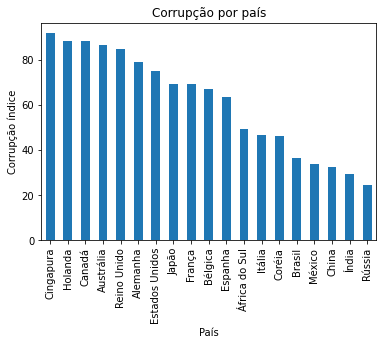

In [ ]:
ax = dados_corrupcao.plot.bar(x = 'pais', y = 'corrupcao_media', legend = None)
plt.xlabel('País')
plt.ylabel('Corrupção índice')
plt.title('Corrupção por país')

7 - Evolução Brasil x Índia

In [ ]:
dados_filtrados = dados_paises[dados_paises['pais'].isin(['Brasil', 'Índia'])]

In [ ]:
dados_filtrados = dados_filtrados.pivot(index = 'ano', columns = 'pais', values='populacao')

Text(0.5, 1.0, 'Comparativo Brasil  x Índia')

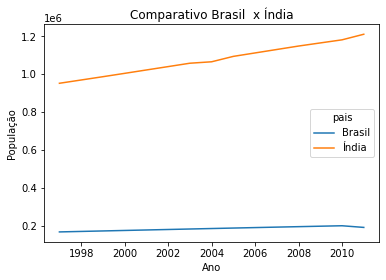

In [ ]:
ax = dados_filtrados.plot.line()
plt.xlabel('Ano')
plt.ylabel('População')
plt.title('Comparativo Brasil  x Índia')

8 - Gráfico IDH v.s. Corrupção

In [ ]:
dados_agregados = dados_paises.groupby('pais').agg(idh_medio = pd.NamedAgg(column = 'idh', aggfunc = np.mean),
                                                    corrupcao_media = pd.NamedAgg(column = 'corrupcao_indice', aggfunc = np.mean))

Text(0.5, 1.0, 'Relação Corrupção x IDH')

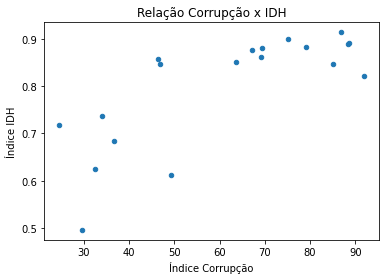

In [ ]:
# basico
ax = dados_agregados.plot.scatter(x = 'corrupcao_media', y = 'idh_medio')
plt.xlabel('Índice Corrupção')
plt.ylabel('Índice IDH')
plt.title('Relação Corrupção x IDH')

Text(0.5, 1.0, 'Relação Corrupção x IDH')

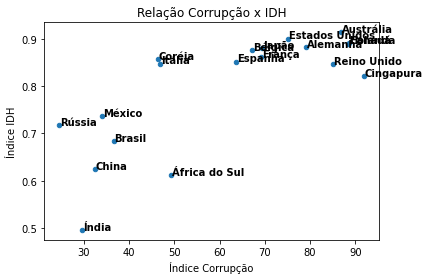

In [ ]:
# advanced
ax = dados_agregados.plot.scatter(x = 'corrupcao_media', y = 'idh_medio')
for line in range(0,dados_agregados.shape[0]):
     ax.text(dados_agregados.corrupcao_media[line]+0.2, 
             dados_agregados.idh_medio[line], 
             dados_agregados.index[line], 
             horizontalalignment='left', 
             size='medium', 
             color='black', 
             weight='semibold')
plt.xlabel('Índice Corrupção')
plt.ylabel('Índice IDH')
plt.title('Relação Corrupção x IDH')